In [6]:
import numpy as np
from getdist import plots, MCSamples

In [31]:
n = 24
v = 52
pmc_res = np.load(f"../output/cov_sample_{n}_results_pocomc_v{v}.npy", allow_pickle=True)
zeus_res = np.load(f"../output/cov_sample_{n}_results_zeus_v{v}.npy")
emc_res = np.load(f"../output/cov_sample_{n}_results_emcee_v{v}.npy")

In [32]:
pmc_samples = pmc_res[()]["samples"]
zeus_samples = zeus_res[500:,:,:].reshape((-1,2), order="F")
emc_samples = emc_res[500:,:,:].reshape((-1,2), order="F")

In [33]:
print(pmc_samples.shape)
print(zeus_samples.shape)
print(emc_samples.shape)

(2000, 2)
(2000, 2)
(2000, 2)


In [34]:
names = ["b", "f"]
labels = ["b", "f"]

pmc_samp = MCSamples(samples=pmc_samples, labels=labels, names=names)
zeus_samp = MCSamples(samples=zeus_samples, labels=labels, names=names)
emc_samp = MCSamples(samples=emc_samples, labels=labels, names=names)

Removed no burn in
Removed no burn in
Removed no burn in


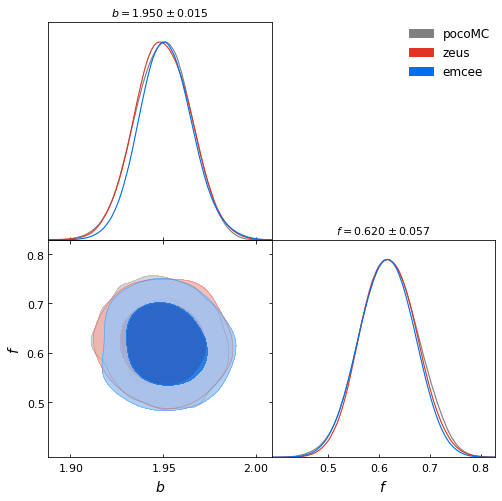

In [35]:
g = plots.getSubplotPlotter(subplot_size=4)
g.settings.figure_legend_frame = False
g.triangle_plot(
    [pmc_samp, zeus_samp, emc_samp],
    filled=True,
    contour_args={'alpha':0.8}, title_limit=1,
    legend_labels=["pocoMC", "zeus", "emcee"]
)